In [1]:
import geopandas as gpd

from cost_model import cost_from_metro, sort_df_by_list, projected
from dsd_processing import spatial_csv

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plot_adj(axes, title=""):
    """
    Helper function to set axis, title, labels consistenly etc.
    """
    axes.set_title(title)
    axes.set_xticks(list(range(1,11)))
    axes.set_yticks(list(range(1,11)))
    axes.set_xlabel("Destination Municipio")
    axes.set_ylabel("Origin Municipio")

In [3]:
def plot_multicost(cost, titles=[], cmap="RdYlBu_r", extent=[0.5,10.5,10.5,0.5], figsize=(14,3)):
    """
    TODO: FIX
    """
    
    fig, axes = plt.subplots(nrows=1, ncols=len(cost), figsize=figsize)
    
    assert len(cost)==len(titles), "need same number titles as cost matrices"
    if len(cost) == 1:
        cbarimg = axes.imshow(cost[0], cmap, extent)
        plot_cost(axes, titles[0])
    else:
        for i in range(len(cost)):
            cbarimg = axes[i].imshow(cost[i], cmap, extent)
            plot_cost(axes, titles[i])
        
        
    cbar = plt.colorbar(cbarimg)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Travel Time (Minutes)', rotation=270)

    plt.show()

## Imports

In [4]:
data_path = "../provided_data/"
spatial_path = "../spatial_data/"

In [5]:
metro = spatial_csv("medellin_metro.csv", path=data_path)
metro = metro.rename(columns={"Unnamed: 8":"Transfer_2"})

muni_pop = spatial_csv("muni_pop_ed.csv", path=data_path)
muni_names = list(muni_pop["Unnamed: 0"].values)

comunas = spatial_csv("comunas_new.csv", path=data_path)

# read in and sort municipality correctly
municip = projected(gpd.read_file(spatial_path+"municipalities"))
municip = sort_df_by_list(municip, muni_names)

## Find Costs

In [6]:
# estimated speed in minutes per meter
transit_speed = {"Metro": 1/1600, "Cable": 1/1600, 
                 "Tramway":1/1000, "Bus rapid transit": 1/400, 
                 "Walk": 1/84} 

transit_wait = {"Metro": 1, "Cable": 2.5, "Tramway":2.5, "Bus rapid transit": 5} #minutes

In [33]:
cost = cost_from_metro(metro, municip, 
                       speed=transit_speed, 
                       wait=transit_wait, 
                       comunas=comunas)

In [34]:
# estimated speed in minutes per meter
transit_speed2 = {"Metro": 1/160, "Cable": 1/160, 
                 "Tramway":1/160, "Bus rapid transit": 1/160, 
                 "Walk": 1/84} 

transit_wait2 = {"Metro": 1, "Cable": 2.5, "Tramway":2.5, "Bus rapid transit": 5} #minutes

cost2 = cost_from_metro(metro, municip, 
                       speed=transit_speed2, 
                       wait=transit_wait2, 
                       comunas=comunas)

In [35]:
cost3 = cost_from_metro(metro, municip, 
                       speed=transit_speed, 
                       wait=transit_wait)

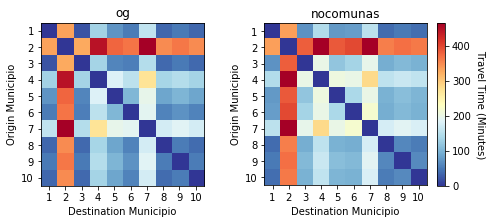

In [37]:
# visualize travel cost
costs = [cost, cost3]
titles = ["og", "nocomunas"]
_min, _max = np.amin(costs), np.amax(costs)

fig, axes = plt.subplots(nrows=1, ncols=len(costs), figsize=(3*len(costs)+2,3))

for i in range(len(costs)):
    cbarimg = axes[i].imshow(costs[i], vmin=_min, vmax=_max, 
                             cmap="RdYlBu_r", extent=[0.5,10.5,10.5,0.5])
    plot_adj(axes[i],titles[i])

cbar = plt.colorbar(cbarimg)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Travel Time (Minutes)', rotation=270)

plt.show()

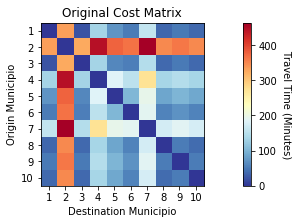

In [18]:
# visualize travel cost
cmap="RdYlBu_r"
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,3))

cbarimg = axes.imshow(cost, cmap=cmap, extent=[0.5,10.5,10.5,0.5])
plot_adj(axes, "Original Cost Matrix")

cbar = plt.colorbar(cbarimg)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Travel Time (Minutes)', rotation=270)

plt.show()

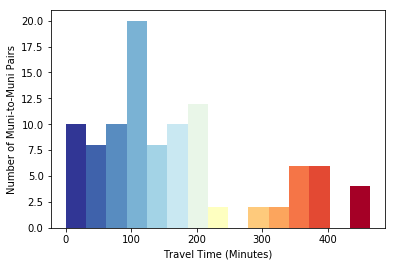

In [38]:
# create histogram of costs to help debug etc, with colorscheme matching the above
nbins = 15

cm = plt.cm.get_cmap(cmap)

fig, axes = plt.subplots(figsize=(6,4))
n, bins, patches = plt.hist(cost3.flatten().tolist(), nbins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.xlabel("Travel Time (Minutes)")
plt.ylabel("Number of Muni-to-Muni Pairs")
plt.show()

In [23]:
# export shapefile of all centroids
muni_names


['Medellin',
 'Barbosa',
 'Bello',
 'Caldas',
 'Copacabana',
 'Envigado',
 'Girardota',
 'Itagui',
 'La Estrella',
 'Sabaneta']